# GTSRB Minimalistic Dataset and Dataloader

In [1]:
%load_ext autoreload
%autoreload 2
%reload_ext autoreload

In [2]:
import os
import matplotlib.pyplot as plt
import PIL as Image
import numpy as np
import torch
from torchvision.datasets import ImageFolder
from pytorch_lightning.utilities.types import TRAIN_DATALOADERS, EVAL_DATALOADERS
import torchvision.transforms as transforms
from datasets import GtsrbModule
# from datasets.gtsrb import GtsrbMinimalisticModule

Datapaths for different dataset splits

In [3]:
dataset_path = "/media/farnez/Data/DATASETS/gtsrb-data/"
ds_train_path = "/media/farnez/Data/DATASETS/gtsrb-data/train_images"
ds_val_path = "/media/farnez/Data/DATASETS/gtsrb-data/val_images"
ds_test_path = "/media/farnez/Data/DATASETS/gtsrb-data/test_images"

## Create Dataset with ImageFolder

In [4]:
ds_gtsrb_train = ImageFolder(ds_train_path,
                             transform=transforms.ToTensor())

ds_gtsrb_valid = ImageFolder(ds_val_path,
                             transform=transforms.ToTensor())

ds_gtsrb_test = ImageFolder(ds_test_path,
                            transform=transforms.ToTensor())

## Check GTSRB Minimalistic Dataset

In [5]:
print("GTSRB train-split number of classes: ", len(ds_gtsrb_train.class_to_idx.keys()))
print("GTSRB valid-split number of classes: ", len(ds_gtsrb_valid.class_to_idx.keys()))
print("GTSRB test-split number of classes: ", len(ds_gtsrb_test.class_to_idx.keys()))

GTSRB train-split number of classes:  43
GTSRB valid-split number of classes:  43
GTSRB test-split number of classes:  43


In [6]:
ds_gtsrb_train.classes  # these are the folder names, in the datast forlder structure

['00000',
 '00001',
 '00002',
 '00003',
 '00004',
 '00005',
 '00006',
 '00007',
 '00008',
 '00009',
 '00010',
 '00011',
 '00012',
 '00013',
 '00014',
 '00015',
 '00016',
 '00017',
 '00018',
 '00019',
 '00020',
 '00021',
 '00022',
 '00023',
 '00024',
 '00025',
 '00026',
 '00027',
 '00028',
 '00029',
 '00030',
 '00031',
 '00032',
 '00033',
 '00034',
 '00035',
 '00036',
 '00037',
 '00038',
 '00039',
 '00040',
 '00041',
 '00042']

In [7]:
ds_gtsrb_train.class_to_idx  # these are the folder names mapped to a class idx

{'00000': 0,
 '00001': 1,
 '00002': 2,
 '00003': 3,
 '00004': 4,
 '00005': 5,
 '00006': 6,
 '00007': 7,
 '00008': 8,
 '00009': 9,
 '00010': 10,
 '00011': 11,
 '00012': 12,
 '00013': 13,
 '00014': 14,
 '00015': 15,
 '00016': 16,
 '00017': 17,
 '00018': 18,
 '00019': 19,
 '00020': 20,
 '00021': 21,
 '00022': 22,
 '00023': 23,
 '00024': 24,
 '00025': 25,
 '00026': 26,
 '00027': 27,
 '00028': 28,
 '00029': 29,
 '00030': 30,
 '00031': 31,
 '00032': 32,
 '00033': 33,
 '00034': 34,
 '00035': 35,
 '00036': 36,
 '00037': 37,
 '00038': 38,
 '00039': 39,
 '00040': 40,
 '00041': 41,
 '00042': 42}

In [8]:
len(ds_gtsrb_train.samples)

35600

In [9]:
idx2label_gtsrb_min = {
                        0: 'Speed limit (30km/h)',
                        1: 'Speed limit (50km/h)',
                        2: 'Speed limit (60km/h)',
                        3: 'Speed limit (70km/h)',
                        4: 'Speed limit (80km/h)',
                        5: 'Speed limit (100km/h)',
                        6: 'Speed limit (120km/h)',
                        7: 'No passing',
                        8: 'No passing for vehicles over 3.5 metric tons',
                        9: 'Right-of-way at the next intersection',
                        10: 'Priority road',
                        11: 'Yield',
                        12: 'Stop',
                        13: 'No entry',
                        14: 'Road work',
                        15: 'Ahead only',
                        16: 'Go straight or right',
                        17: 'Go straight or left',
                        18: 'Keep right'
                      }

In [10]:
idx2label_gtsrb_min[12]

'Stop'

## Check GTSRB Minimalistic PyTorch-Lightning DataModule

In [11]:
from datasets.gtsrb import GtsrbMinimalisticModule

### Datamodule Instance

In [133]:
dataset_path = "/media/farnez/Data/DATASETS/gtsrb-minimalistic-data/"

In [4]:
data_module = GtsrbMinimalisticModule(data_path=dataset_path, batch_size=32, shuffle=True)

In [5]:
data_module.setup(stage='fit')
data_module.ds_gtsrb_train

Dataset ImageFolder
    Number of datapoints: 27928
    Root location: /media/farnez/Data/DATASETS/gtsrb-minimalistic-data/train_images/
    StandardTransform
Transform: <datasets.gtsrb.Transforms object at 0x7f64e7cdd290>

In [6]:
data_module.setup(stage='validate')
data_module.ds_gtsrb_valid

Dataset ImageFolder
    Number of datapoints: 1562
    Root location: /media/farnez/Data/DATASETS/gtsrb-minimalistic-data/val_images/
    StandardTransform
Transform: <datasets.gtsrb.Transforms object at 0x7f645100b1d0>

### Check Samples Train Dataloader

In [7]:
train_loader = data_module.train_dataloader()
len(train_loader)

873

In [8]:
dataiter = iter(train_loader)

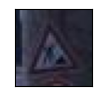

In [55]:
samp, lbl = dataiter.next()
data_module.unprocess_image(samp[2], plot=True)

### Check Samples Validation Dataloader

In [56]:
valid_loader = data_module.val_dataloader()
len(valid_loader)

49

In [117]:
dataiter_val= iter(valid_loader)

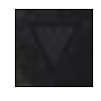

In [130]:
samp_val, lbl_val = dataiter_val.next()
data_module.unprocess_image(samp_val[4], plot=True)

## Plot Dataset Classes Reference Image

Check the following link to get all the classes reference images:

https://www.kaggle.com/datasets/meowmeowmeowmeowmeow/gtsrb-german-traffic-sign?resource=download

In [103]:
import glob
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline


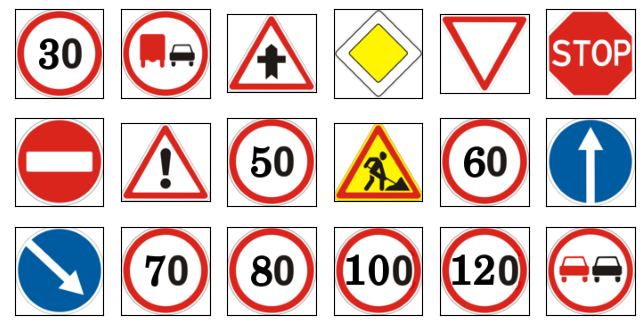

In [104]:
dataset_path = "/media/farnez/Data/DATASETS/gtsrb-minimalistic-data/"
images = []

for img_path in glob.glob(dataset_path+'gtsrb_ref_img/*.png'):
    images.append(mpimg.imread(img_path))

plt.figure(figsize=(8,4))
columns = 6
for i, image in enumerate(images):
    plt.subplot(int(len(images) / columns), columns, i + 1)
    plt.imshow(image)
    plt.xticks([])
    plt.yticks([])

plt.show()

## Check GTSRB PyTorch-Lightning DataModule

In [556]:
from datasets import GtsrbModule

### Datamodule Instance

In [557]:
dataset_path = "/media/farnez/Data/DATASETS/gtsrb-data/"

In [558]:
data_module = GtsrbModule(data_path=dataset_path, batch_size=32, shuffle=True)

In [559]:
data_module.setup(stage='fit')
data_module.ds_gtsrb_train

Dataset ImageFolder
    Number of datapoints: 35600
    Root location: /media/farnez/Data/DATASETS/gtsrb-data/train_images/
    StandardTransform
Transform: <datasets.gtsrb.Transforms object at 0x7f2d30469290>

In [560]:
data_module.setup(stage='validate')
data_module.ds_gtsrb_valid

Dataset ImageFolder
    Number of datapoints: 3609
    Root location: /media/farnez/Data/DATASETS/gtsrb-data/val_images/
    StandardTransform
Transform: <datasets.gtsrb.Transforms object at 0x7f2dd4893a10>

In [561]:
len(data_module.ds_gtsrb_train.classes)

43

### Check Samples Train Dataloader

In [562]:
train_loader = data_module.train_dataloader()
len(train_loader)

1113

In [563]:
dataiter = iter(train_loader)

Priority road


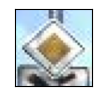

In [565]:
samp, lbl = dataiter.next()
lbl_np = lbl[1].cpu().numpy()
print(data_module.idx2label[lbl_np.item()])
data_module.unprocess_image(samp[1], plot=True)

### Check Samples Validation Dataloader

In [566]:
valid_loader = data_module.val_dataloader()
len(valid_loader)

113

In [567]:
dataiter_val= iter(valid_loader)

Speed limit (30km/h)


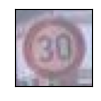

In [585]:
samp_val, lbl_val = dataiter_val.next()
# data_module.unprocess_image(samp_val[4], plot=True)
lbl_np = lbl_val[1].cpu().numpy()
print(data_module.idx2label[lbl_np.item()])
data_module.unprocess_image(samp_val[1], plot=True)

## Check GTSRB Datamodule Anomalies

In [714]:
from datasets import GtsrbModule

In [715]:
dataset_path = "/media/farnez/Data/DATASETS/gtsrb-data/"

In [759]:
data_module_anomalies = GtsrbModule(data_path=dataset_path, batch_size=8, shuffle=True, anomaly_transforms=True)

In [760]:
data_module_anomalies.setup(stage='validate')
print(data_module_anomalies.ds_gtsrb_valid)
data_module_anomalies.setup(stage='test')
print(data_module_anomalies.ds_gtsrb_test)

Dataset ImageFolder
    Number of datapoints: 3609
    Root location: /media/farnez/Data/DATASETS/gtsrb-data/val_images/
    StandardTransform
Transform: <datasets.gtsrb.Transforms object at 0x7f2dd45da2d0>
Dataset ImageFolder
    Number of datapoints: 1273
    Root location: /media/farnez/Data/DATASETS/gtsrb-data/test_images/
    StandardTransform
Transform: <datasets.gtsrb.Transforms object at 0x7f2d38695c10>


### Check Samples Valid Dataloader

### Check Samples Validation Dataloader

In [761]:
valid_anomaly_loader = data_module_anomalies.val_dataloader()
len(valid_loader)

113

In [762]:
dataiter_val_anom= iter(valid_anomaly_loader)

Speed limit (50km/h)


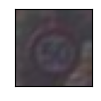

In [790]:
samp_val, lbl_val = dataiter_val_anom.next()
# data_module.unprocess_image(samp_val[4], plot=True)
lbl_np = lbl_val[1].cpu().numpy()
print(data_module_anomalies.idx2label[lbl_np.item()])
data_module_anomalies.unprocess_image(samp_val[1], plot=True)